# Machine Learning (SVM & Random Forest)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_validate
import seaborn as sn
import matplotlib.pyplot as plt
import graphviz
#pd.set_option('display.max_rows', 500)

#### Import dataset

In [2]:
ngs_reads = pd.read_json('exported_datasets/efcm_full_features.json')

In [3]:
ngs_reads.reset_index(drop=True, inplace=True)

In [4]:
ngs_reads.columns

Index(['organism', 'technology', 'read_number', 'evaluation',
       'module_6_n_content', 'total_sequences', 'percent_gc',
       'min_sequence_length', 'max_sequence_length', 'module_1_status',
       'module_2_status', 'module_3_status', 'module_4_status',
       'module_5_status', 'module_6_status', 'module_7_status',
       'module_8_status', 'module_9_status', 'module_10_status', 'module_1_a0',
       'module_1_a1', 'module_1_a2', 'module_1_a3', 'module_2_std_neg',
       'module_2_std_pos', 'module_3_alpha', 'module_3_beta',
       'module_4_diff_mean', 'module_4_diff_std', 'module_7_alpha',
       'module_7_beta', 'module_8_alpha', 'module_8_beta'],
      dtype='object')

In [5]:
# remove features from first run for now

ngs_reads.drop(columns=['module_1_status', 'module_2_status', 'module_3_status', 'module_4_status',
                       'module_5_status', 'module_6_status', 'module_7_status', 'module_8_status',
                       'module_9_status', 'module_10_status', 'total_sequences', 'percent_gc',
                       'min_sequence_length', 'max_sequence_length'], inplace=True)

In [6]:
ngs_reads.columns

Index(['organism', 'technology', 'read_number', 'evaluation',
       'module_6_n_content', 'module_1_a0', 'module_1_a1', 'module_1_a2',
       'module_1_a3', 'module_2_std_neg', 'module_2_std_pos', 'module_3_alpha',
       'module_3_beta', 'module_4_diff_mean', 'module_4_diff_std',
       'module_7_alpha', 'module_7_beta', 'module_8_alpha', 'module_8_beta'],
      dtype='object')

#### extract target variable

In [7]:
target = ngs_reads.evaluation.values
ngs_reads.drop(columns='evaluation', inplace=True)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### remove unused columns from dataset

In [8]:
ngs_reads.drop(columns=['organism', 'technology', 'read_number'], inplace=True)
ngs_reads

,module_6_n_content,module_1_a0,module_1_a1,module_1_a2,module_1_a3,module_2_std_neg,module_2_std_pos,module_3_alpha,module_3_beta,module_4_diff_mean,module_4_diff_std,module_7_alpha,module_7_beta,module_8_alpha,module_8_beta
0,1.583196e-04,37.569493,-0.019475,0.000185,-6.278000e-07,0.385013,0.385415,166.409553,5.214479,0.035844,0.064873,170.618513,1.005274,0.391439,18.665416
1,1.117211e-04,37.281142,0.023739,-0.000245,-8.320000e-08,0.121340,0.068446,166.392354,5.221345,0.020362,0.062808,170.592963,1.019400,0.082491,4.776467
2,5.114000e-07,37.165470,-0.040745,0.000379,-1.129200e-06,0.315845,0.165511,166.140604,5.451245,0.023010,0.064142,170.641425,0.982654,0.147022,9.723556
3,6.196000e-07,36.176837,-0.033045,0.000235,-1.153000e-06,1.027438,0.425438,156.377108,14.652466,0.024049,0.065723,170.626139,0.994454,0.156148,10.238692
4,9.081810e-05,37.054885,0.023273,-0.000217,-3.266000e-07,0.262169,0.086567,165.721361,5.845131,0.020997,0.064547,170.592963,1.019400,0.085682,5.014081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,9.438420e-05,39.054194,-0.008970,0.000096,-4.000000e-07,0.051924,0.072236,166.420364,4.940322,0.028492,0.066430,170.461306,1.161733,0.035012,3.259176
84,1.997554e-03,38.716937,-0.018695,0.000190,-7.455000e-07,0.088583,0.075866,166.432328,5.183535,0.025113,0.067765,170.397161,1.134837,0.040512,2.163178
85,8.432410e-05,38.991980,-0.009298,0.000101,-4.340000e-07,0.067566,0.062786,166.649269,4.959551,0.029550,0.067901,170.407269,1.203378,-1.156613,0.001990
86,2.184314e-03,38.831916,-0.018773,0.000193,-7.697000e-07,0.075292,0.070757,166.049585,5.179259,0.025674,0.067058,170.497554,1.105446,0.044248,2.964755


#### train-test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(ngs_reads, target, test_size=0.3, random_state=109)

#### Confusion Matrix Heatmap Training Set

<AxesSubplot:>

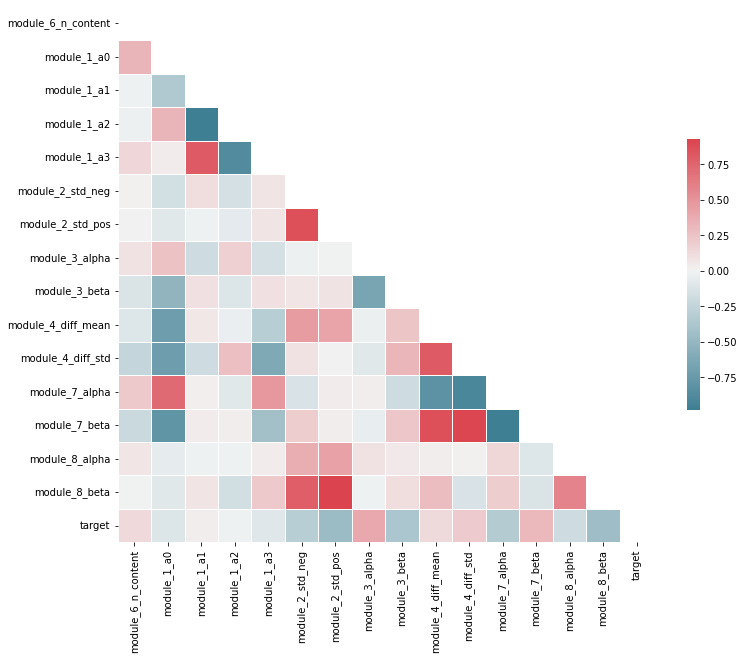

In [10]:
train = X_train.copy()
train.loc[:, 'target'] = y_train.tolist()
train

corr_matrix = train.corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

#### Support Vector Machine Training

In [11]:
clf_svc = svm.SVC(kernel='linear')

In [12]:
clf_svc.fit(X_train, y_train)

SVC(kernel='linear')

##### SVM performance

In [13]:
y_pred=clf_svc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8888888888888888
Precision:  0.85
Recall:  1.0
F1 Score:  0.9189189189189189


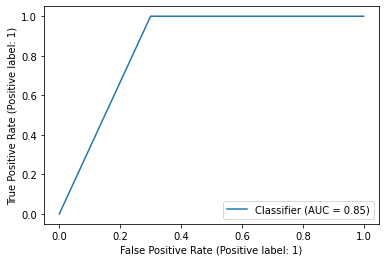

In [14]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### SVM with Cross Validation

In [15]:
clf_svm_cv = svm.SVC(kernel='linear')
scores = cross_validate(clf_svm_cv, ngs_reads, target, cv=5, 
                        scoring=('accuracy', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("F1 Scores: ", scores['test_f1'])

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [0.88888889 0.83333333 1.         1.         0.76470588]
F1 Scores:  [0.91666667 0.88       1.         1.         0.83333333]
Accuracy: 0.90 +/- 0.09
F1 Score: 0.93 +/- 0.07


#### Decision Tree

In [16]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

In [17]:
y_pred = clf_dt.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9259259259259259
Precision:  0.9411764705882353
Recall:  0.9411764705882353
F1 Score:  0.9411764705882353


[Text(0.4583333333333333, 0.9, 'module_2_std_neg <= 0.113\ngini = 0.477\nsamples = 61\nvalue = [24, 37]\nclass = good'),
 Text(0.25, 0.7, 'module_4_diff_std <= 0.064\ngini = 0.056\nsamples = 35\nvalue = [1, 34]\nclass = good'),
 Text(0.16666666666666666, 0.5, 'module_3_beta <= 5.13\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = good'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = good'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]\nclass = good'),
 Text(0.6666666666666666, 0.7, 'module_3_beta <= 5.178\ngini = 0.204\nsamples = 26\nvalue = [23, 3]\nclass = ugly'),
 Text(0.5, 0.5, 'module_1_a0 <= 38.108\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = ugly'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = good'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = ugly'),
 Text(0.8

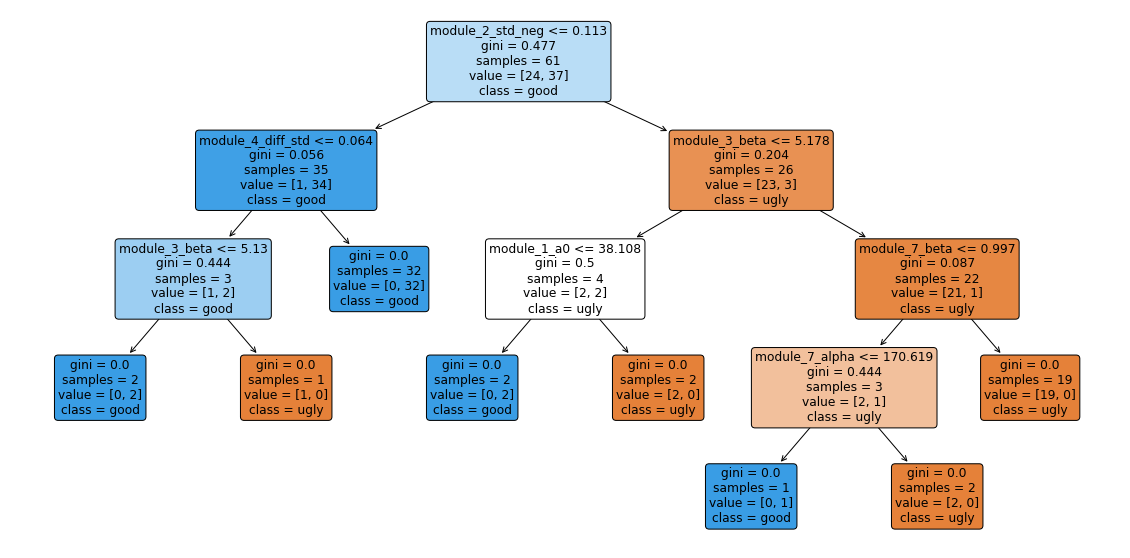

In [18]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_dt, 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

#### Random Forest Training

In [19]:
clf_rf=RandomForestClassifier(n_estimators=100, verbose=True)

In [20]:
clf_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(verbose=True)

##### Random Forest performance

In [21]:
y_pred = clf_rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9259259259259259
Precision:  0.9411764705882353
Recall:  0.9411764705882353
F1 Score:  0.9411764705882353


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


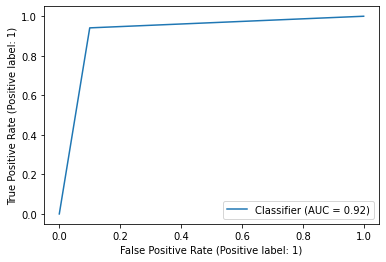

In [22]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### Feature Importance Random Forest

Text(0.5, 0, 'Relative Importance')

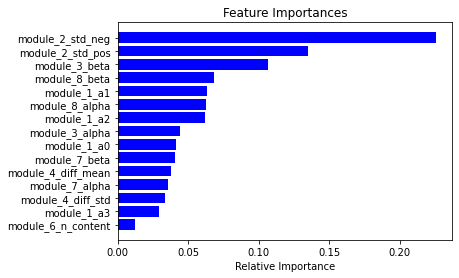

In [23]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.xlabel('Relative Importance')

#### Random Forest with Cross Validation

In [24]:
clf_rf_cv = RandomForestClassifier(n_estimators=100)
scores = cross_validate(clf_rf_cv, ngs_reads, target, cv=5, 
                        scoring=('accuracy', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("F1 Scores: ", scores['test_f1'])

# higher cv results in most accuracies = 1.0

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [0.66666667 0.88888889 1.         1.         0.76470588]
F1 Scores:  [0.625      0.91666667 1.         1.         0.84615385]
Accuracy: 0.86 +/- 0.13
F1 Score: 0.88 +/- 0.14


#### Visualize some trees of the Random Forest

[Text(0.6666666666666666, 0.9, 'module_2_std_pos <= 0.098\ngini = 0.493\nsamples = 40\nvalue = [27, 34]\nclass = good'),
 Text(0.5, 0.7, 'module_1_a1 <= -0.004\ngini = 0.331\nsamples = 29\nvalue = [9, 34]\nclass = good'),
 Text(0.3333333333333333, 0.5, 'module_1_a1 <= -0.025\ngini = 0.188\nsamples = 26\nvalue = [4, 34]\nclass = good'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 19\nvalue = [0, 27]\nclass = good'),
 Text(0.5, 0.3, 'module_1_a2 <= 0.0\ngini = 0.463\nsamples = 7\nvalue = [4, 7]\nclass = good'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 7]\nclass = good'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [4, 0]\nclass = ugly'),
 Text(0.6666666666666666, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [5, 0]\nclass = ugly'),
 Text(0.8333333333333334, 0.7, 'gini = 0.0\nsamples = 11\nvalue = [18, 0]\nclass = ugly')]

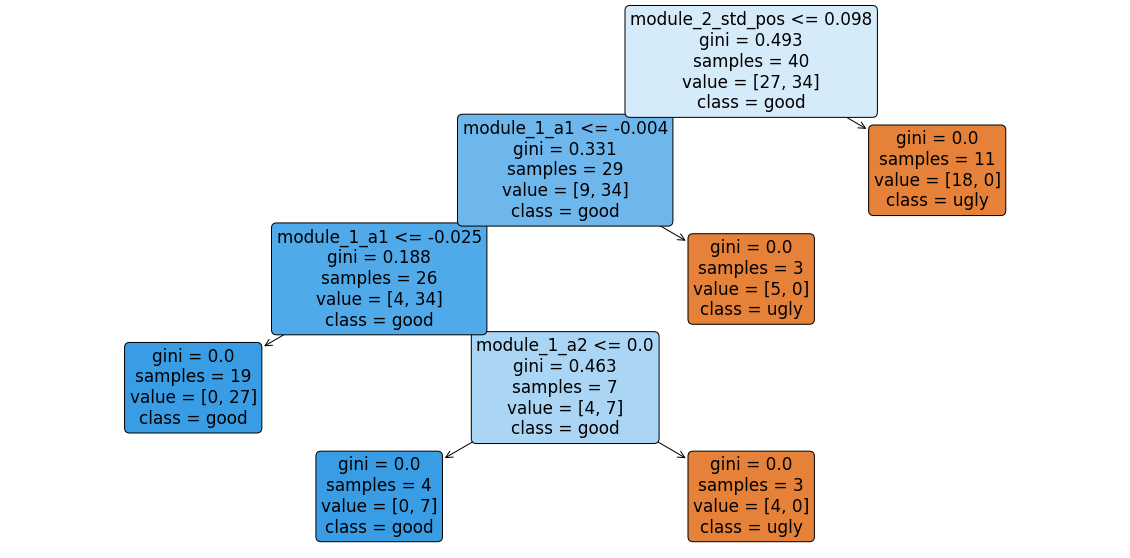

In [25]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[0], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

[Text(0.5, 0.875, 'module_2_std_neg <= 0.113\ngini = 0.451\nsamples = 39\nvalue = [21, 40]\nclass = good'),
 Text(0.2, 0.625, 'module_2_std_neg <= 0.091\ngini = 0.053\nsamples = 22\nvalue = [1, 36]\nclass = good'),
 Text(0.1, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [0, 34]\nclass = good'),
 Text(0.3, 0.375, 'module_1_a2 <= 0.0\ngini = 0.444\nsamples = 2\nvalue = [1, 2]\nclass = good'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]\nclass = good'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.8, 0.625, 'module_4_diff_mean <= 0.021\ngini = 0.278\nsamples = 17\nvalue = [20, 4]\nclass = ugly'),
 Text(0.7, 0.375, 'module_7_beta <= 1.041\ngini = 0.49\nsamples = 5\nvalue = [3, 4]\nclass = good'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = ugly'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 4]\nclass = good'),
 Text(0.9, 0.375, 'gini = 0.0\nsamples = 12\nvalue = [17, 0]\nclass = ugly')]

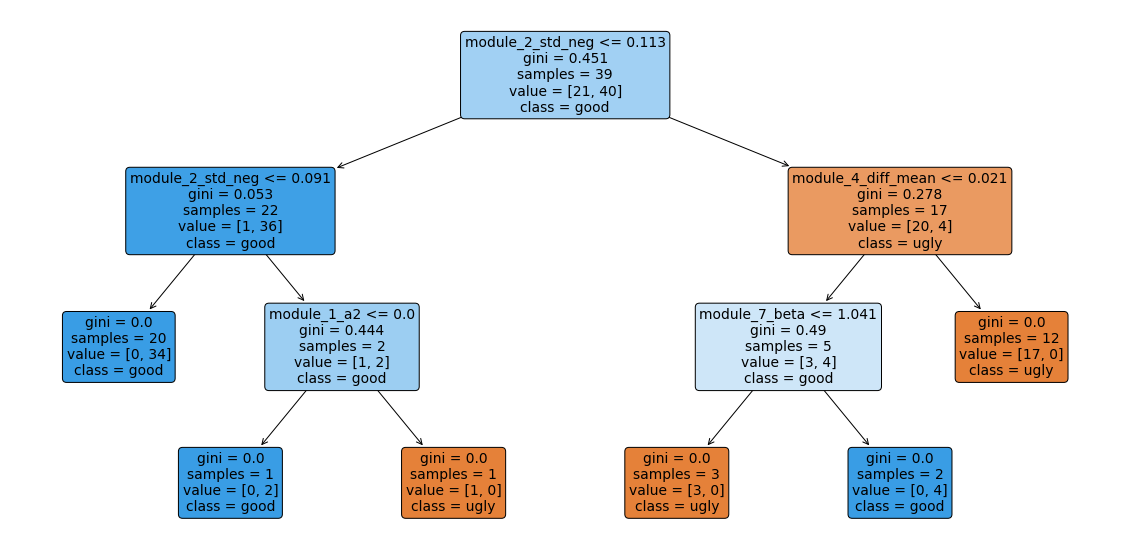

In [26]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[12], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

#### Other Classification Algorithms

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
clf_lg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [28]:
y_pred = clf_lg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9259259259259259
Precision:  0.8947368421052632
Recall:  1.0
F1 Score:  0.9444444444444444


Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB().fit(X_train, y_train)

In [30]:
y_pred = clf_gnb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9259259259259259
Precision:  0.8947368421052632
Recall:  1.0
F1 Score:  0.9444444444444444


K Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8888888888888888
Precision:  0.85
Recall:  1.0
F1 Score:  0.9189189189189189
